First step is to import the data.

In [1]:
from ucimlrepo import fetch_ucirepo
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

In [2]:
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [3]:
# function for constructing gradient boosted trees
def gradientBoostingClassifier(max_leaf_nodes = 5, max_depth = 10, verbose = 0, n_estimators = 100, learning_rate=0.1, subsample=1.0):
    """
    Gradient boosted tree classifier using the scikit-learn function
    GradientBoostingClassifier.

    The log_loss (binomial deviance) function is used as loss function.
    The number of features randomly selected in each split is sqrt(total # features)

    n_estimators is the effective number of trees and this is the parameter that we
    are going to tune, primarily.
    """
    model = GradientBoostingClassifier(
        loss = 'log_loss',
        max_features = 'sqrt',
        max_depth = max_depth,
        max_leaf_nodes =  max_leaf_nodes,
        n_estimators = n_estimators,
        verbose = verbose,
        random_state=0,
        learning_rate=learning_rate,
        subsample=subsample
    )
    return model

# Learning Rate

In [5]:
# examining three models where max #leaf nodes = 2, 5, 10

# specifying the range of number of trees to examine
M_values_lr = range(10, 1510, 10)
cv_errors_1_lr = []  # Store mean CV errors for first model
# std_errors_1 = []  # Store CV standard errors of first model

cv_errors_2_lr = [] # second model ...
# std_errors_2 = [] 

cv_errors_3_lr = [] # third model ...
# std_errors_3 = []  

cv_errors_4_lr = []
cv_errors_5_lr = []

# Perform 10-fold CV for each M
for M in M_values_lr:

    model_1 = gradientBoostingClassifier(n_estimators=M, max_leaf_nodes=4, subsample=1, learning_rate=0.02)
    scores = cross_val_score(model_1, X, y, cv=10, scoring='accuracy') 
    mean_error = 1 - np.mean(scores)  # CV error
    # std_error = np.std(scores) / np.sqrt(len(scores))
    cv_errors_1_lr.append(mean_error)
    # std_errors_2.append(std_error)

    model_2 = gradientBoostingClassifier(n_estimators=M, max_leaf_nodes=4, subsample=1, learning_rate=0.04)
    scores = cross_val_score(model_2, X, y, cv=10, scoring='accuracy') 
    mean_error = 1 - np.mean(scores)  # CV error
    # std_error = np.std(scores) / np.sqrt(len(scores))
    cv_errors_2_lr.append(mean_error)
    # std_errors_3.append(std_error)

    model_3 = gradientBoostingClassifier(n_estimators=M, max_leaf_nodes=4, subsample=1, learning_rate=0.06)
    scores = cross_val_score(model_3, X, y, cv=10, scoring='accuracy') 
    mean_error = 1 - np.mean(scores)  # CV error
    # std_error = np.std(scores) / np.sqrt(len(scores))
    cv_errors_3_lr.append(mean_error)
    # std_errors_3.append(std_error)

    model_4 = gradientBoostingClassifier(n_estimators=M, max_leaf_nodes=4, subsample=1, learning_rate=0.08)
    scores = cross_val_score(model_4, X, y, cv=10, scoring='accuracy') 
    mean_error = 1 - np.mean(scores)  # CV error
    # std_error = np.std(scores) / np.sqrt(len(scores))
    cv_errors_4_lr.append(mean_error)
    # std_errors_3.append(std_error)

    model_5 = gradientBoostingClassifier(n_estimators=M, max_leaf_nodes=4, subsample=1, learning_rate=0.1)
    scores = cross_val_score(model_5, X, y, cv=10, scoring='accuracy') 
    mean_error = 1 - np.mean(scores)
    # std_error = np.std(scores) / np.sqrt(len(scores))
    cv_errors_5_lr.append(mean_error)
    # std_errors_1.append(std_error)

c:\Users\aujo8\OneDrive\Desktop\uni\Statistical learning\project4\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aujo8\OneDrive\Desktop\uni\Statistical learning\project4\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aujo8\OneDrive\Desktop\uni\Statistical learning\project4\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aujo8\OneDrive\Desktop\uni\Statistical lear

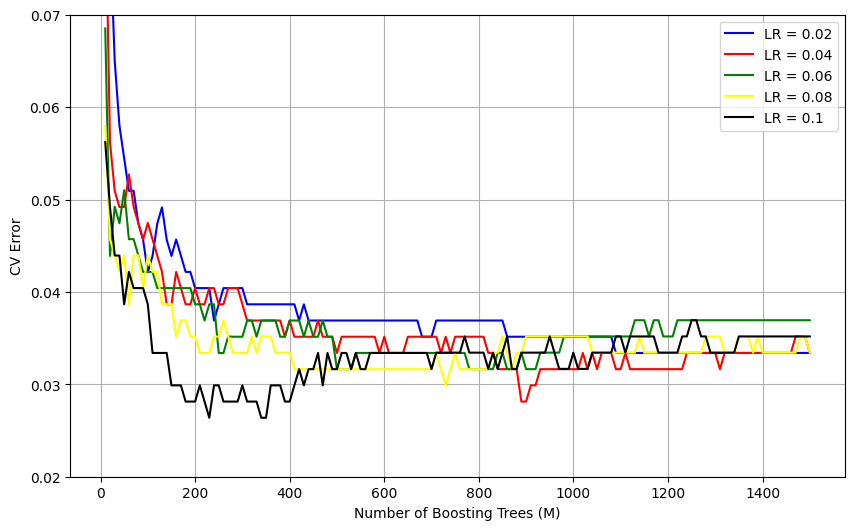

In [6]:
# # and plotting the results
# # Plot CV error versus number of boosting trees M
# plt.figure(figsize=(10, 6))
# plt.errorbar(M_values, cv_errors_1, yerr=std_errors_1, fmt='-o', label='CV Error 2-leaf model', color='blue')
# plt.errorbar(M_values, cv_errors_2, yerr=std_errors_2, fmt='-o', label='CV Error 4-leaf model', color = 'red')
# plt.errorbar(M_values, cv_errors_3, yerr=std_errors_3, fmt='-o', label='CV Error 8-leaf model', color = 'green')
# plt.xlabel('Number of Boosting Trees (M)')
# plt.ylabel('CV Error')
# # plt.title('CV Error vs. Number of Boosting Trees')
# plt.axhline(min(cv_errors_1) + std_errors_1[np.argmin(cv_errors_1)], color='blue', linestyle='--', label='1-SE Line 2-leaf')
# plt.axhline(min(cv_errors_2) + std_errors_2[np.argmin(cv_errors_2)], color='red', linestyle='--', label='1-SE Line 4-leaf')
# plt.axhline(min(cv_errors_3) + std_errors_3[np.argmin(cv_errors_3)], color='green', linestyle='--', label='1-SE Line 8-leaf')
# plt.legend()
# plt.grid()
# plt.show()

# and plotting the results
# Plot CV error versus number of boosting trees M
plt.figure(figsize=(10, 6))
plt.errorbar(M_values_lr, cv_errors_1_lr, label='LR = 0.02', color='blue')
plt.errorbar(M_values_lr, cv_errors_2_lr, label='LR = 0.04', color = 'red')
plt.errorbar(M_values_lr, cv_errors_3_lr, label='LR = 0.06', color = 'green')
plt.errorbar(M_values_lr, cv_errors_4_lr, label='LR = 0.08', color='yellow')
plt.errorbar(M_values_lr, cv_errors_5_lr, label='LR = 0.1', color = 'black')
plt.xlabel('Number of Boosting Trees (M)')
plt.ylabel('CV Error')
plt.ylim(0.02, 0.07)
# plt.title('CV Error vs. Number of Boosting Trees')
# plt.axhline(min(cv_errors_1) + std_errors_1[np.argmin(cv_errors_1)], color='blue', linestyle='--', label='1-SE Line 2-leaf')
# plt.axhline(min(cv_errors_2) + std_errors_2[np.argmin(cv_errors_2)], color='red', linestyle='--', label='1-SE Line 4-leaf')
# plt.axhline(min(cv_errors_3) + std_errors_3[np.argmin(cv_errors_3)], color='green', linestyle='--', label='1-SE Line 8-leaf')
plt.legend()
plt.grid()
plt.show()

# Sub-sampling

In [7]:
# examining three models where max #leaf nodes = 2, 5, 10

# specifying the range of number of trees to examine
M_values_ss = range(10, 1510, 10)
cv_errors_1_ss = []  # Store mean CV errors for first model
# std_errors_1 = []  # Store CV standard errors of first model

cv_errors_2_ss = [] # second model ...
# std_errors_2 = [] 

cv_errors_3_ss = [] # third model ...
# std_errors_3 = []  

cv_errors_4_ss = []


# Perform 10-fold CV for each M
for M in M_values_ss:

    model_1 = gradientBoostingClassifier(n_estimators=M, max_leaf_nodes=4, learning_rate=0.02, subsample=0.25)
    scores = cross_val_score(model_1, X, y, cv=10, scoring='accuracy') 
    mean_error = 1 - np.mean(scores)  # CV error
    # std_error = np.std(scores) / np.sqrt(len(scores))
    cv_errors_1_ss.append(mean_error)
    # std_errors_2.append(std_error)

    model_2 = gradientBoostingClassifier(n_estimators=M, max_leaf_nodes=4, learning_rate=0.02, subsample=0.50)
    scores = cross_val_score(model_2, X, y, cv=10, scoring='accuracy') 
    mean_error = 1 - np.mean(scores)  # CV error
    # std_error = np.std(scores) / np.sqrt(len(scores))
    cv_errors_2_ss.append(mean_error)
    # std_errors_3.append(std_error)

    model_3 = gradientBoostingClassifier(n_estimators=M, max_leaf_nodes=4, learning_rate=0.02, subsample=0.75)
    scores = cross_val_score(model_3, X, y, cv=10, scoring='accuracy') 
    mean_error = 1 - np.mean(scores)  # CV error
    # std_error = np.std(scores) / np.sqrt(len(scores))
    cv_errors_3_ss.append(mean_error)
    # std_errors_3.append(std_error)

    model_4 = gradientBoostingClassifier(n_estimators=M, max_leaf_nodes=4, learning_rate=0.02, subsample=1)
    scores = cross_val_score(model_4, X, y, cv=10, scoring='accuracy') 
    mean_error = 1 - np.mean(scores)  # CV error
    # std_error = np.std(scores) / np.sqrt(len(scores))
    cv_errors_4_ss.append(mean_error)
    # std_errors_3.append(std_error)

c:\Users\aujo8\OneDrive\Desktop\uni\Statistical learning\project4\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aujo8\OneDrive\Desktop\uni\Statistical learning\project4\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aujo8\OneDrive\Desktop\uni\Statistical learning\project4\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aujo8\OneDrive\Desktop\uni\Statistical lear

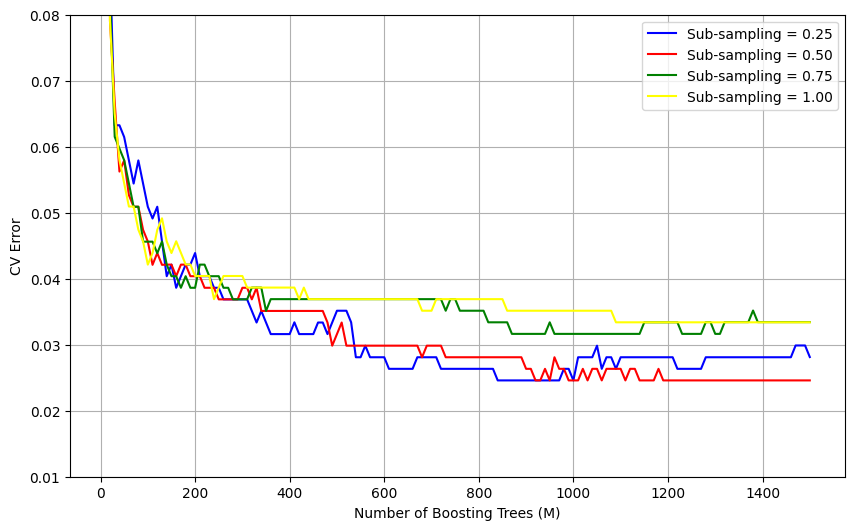

In [20]:
# and plotting the results
# Plot CV error versus number of boosting trees M
plt.figure(figsize=(10, 6))
plt.errorbar(M_values_ss, cv_errors_1_ss, label='Sub-sampling = 0.25', color='blue')
plt.errorbar(M_values_ss, cv_errors_2_ss, label='Sub-sampling = 0.50', color = 'red')
plt.errorbar(M_values_ss, cv_errors_3_ss, label='Sub-sampling = 0.75', color = 'green')
plt.errorbar(M_values_ss, cv_errors_4_ss, label='Sub-sampling = 1.00', color='yellow')
plt.xlabel('Number of Boosting Trees (M)')
plt.ylabel('CV Error')
plt.ylim(0.01, 0.08)
# plt.title('CV Error vs. Number of Boosting Trees')
# plt.axhline(min(cv_errors_1) + std_errors_1[np.argmin(cv_errors_1)], color='blue', linestyle='--', label='1-SE Line 2-leaf')
# plt.axhline(min(cv_errors_2) + std_errors_2[np.argmin(cv_errors_2)], color='red', linestyle='--', label='1-SE Line 4-leaf')
# plt.axhline(min(cv_errors_3) + std_errors_3[np.argmin(cv_errors_3)], color='green', linestyle='--', label='1-SE Line 8-leaf')
plt.legend()
plt.grid()
plt.show()

# Number of leaves

In [9]:
M_values_nl = range(10, 1510, 10)
cv_errors_1_nl = []  # Store mean CV errors for first model
# std_errors_1 = []  # Store CV standard errors of first model

cv_errors_2_nl = [] # second model ...
# std_errors_2 = [] 

cv_errors_3_nl = [] # third model ...
# std_errors_3 = []  


# Perform 10-fold CV for each M
for M in M_values_nl:

    model_1 = gradientBoostingClassifier(n_estimators=M, max_leaf_nodes=2, subsample=0.50)
    scores = cross_val_score(model_1, X, y, cv=10, scoring='accuracy') 
    mean_error = 1 - np.mean(scores)  # CV error
    # std_error = np.std(scores) / np.sqrt(len(scores))
    cv_errors_1_nl.append(mean_error)
    # std_errors_2.append(std_error)

    model_2 = gradientBoostingClassifier(n_estimators=M, max_leaf_nodes=4, subsample=0.50)
    scores = cross_val_score(model_2, X, y, cv=10, scoring='accuracy') 
    mean_error = 1 - np.mean(scores)  # CV error
    # std_error = np.std(scores) / np.sqrt(len(scores))
    cv_errors_2_nl.append(mean_error)
    # std_errors_3.append(std_error)

    model_3 = gradientBoostingClassifier(n_estimators=M, max_leaf_nodes=8, subsample=0.50)
    scores = cross_val_score(model_3, X, y, cv=10, scoring='accuracy') 
    mean_error = 1 - np.mean(scores)  # CV error
    # std_error = np.std(scores) / np.sqrt(len(scores))
    cv_errors_3_nl.append(mean_error)
    # std_errors_3.append(std_error)

c:\Users\aujo8\OneDrive\Desktop\uni\Statistical learning\project4\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aujo8\OneDrive\Desktop\uni\Statistical learning\project4\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aujo8\OneDrive\Desktop\uni\Statistical learning\project4\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aujo8\OneDrive\Desktop\uni\Statistical lear

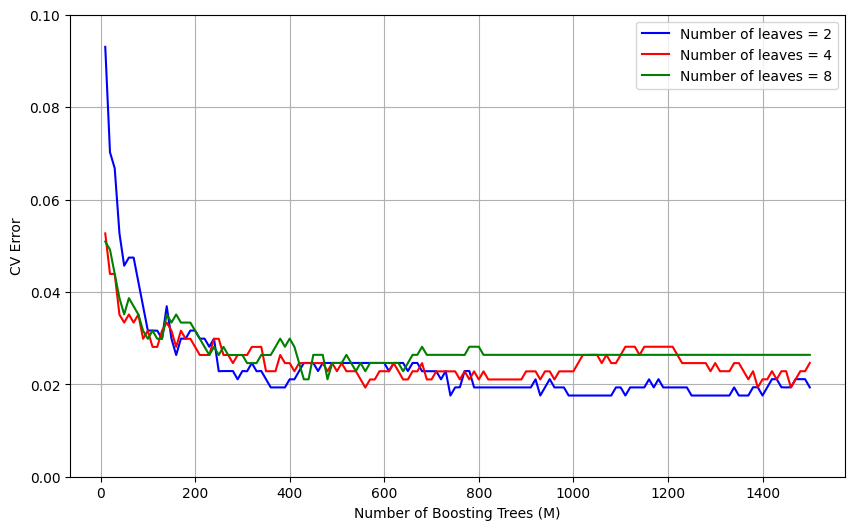

In [10]:
# and plotting the results
# Plot CV error versus number of boosting trees M
plt.figure(figsize=(10, 6))
plt.errorbar(M_values_nl, cv_errors_1_nl, label='Number of leaves = 2', color='blue')
plt.errorbar(M_values_nl, cv_errors_2_nl, label='Number of leaves = 4', color = 'red')
plt.errorbar(M_values_nl, cv_errors_3_nl, label='Number of leaves = 8', color = 'green')
plt.xlabel('Number of Boosting Trees (M)')
plt.ylabel('CV Error')
plt.ylim(0, 0.1)
# plt.title('CV Error vs. Number of Boosting Trees')
# plt.axhline(min(cv_errors_1) + std_errors_1[np.argmin(cv_errors_1)], color='blue', linestyle='--', label='1-SE Line 2-leaf')
# plt.axhline(min(cv_errors_2) + std_errors_2[np.argmin(cv_errors_2)], color='red', linestyle='--', label='1-SE Line 4-leaf')
# plt.axhline(min(cv_errors_3) + std_errors_3[np.argmin(cv_errors_3)], color='green', linestyle='--', label='1-SE Line 8-leaf')
plt.legend()
plt.grid()
plt.show()

In [11]:
M_values_gbt = range(10, 1510, 10)
cv_errors_1_gbt = []  # Store mean CV errors for first model
# std_errors_1 = []  # Store CV standard errors of first model

# Perform 10-fold CV for each M
for M in M_values_gbt:

    model_1 = gradientBoostingClassifier(n_estimators=M, max_leaf_nodes=2, subsample=0.50)
    scores = cross_val_score(model_1, X, y, cv=10, scoring='accuracy') 
    mean_error = 1 - np.mean(scores)  # CV error
    # std_error = np.std(scores) / np.sqrt(len(scores))
    cv_errors_1_gbt.append(mean_error)
    # std_errors_2.append(std_error)

c:\Users\aujo8\OneDrive\Desktop\uni\Statistical learning\project4\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aujo8\OneDrive\Desktop\uni\Statistical learning\project4\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aujo8\OneDrive\Desktop\uni\Statistical learning\project4\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aujo8\OneDrive\Desktop\uni\Statistical lear

C:\Users\aujo8\AppData\Local\Temp\ipykernel_155520\1208402139.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


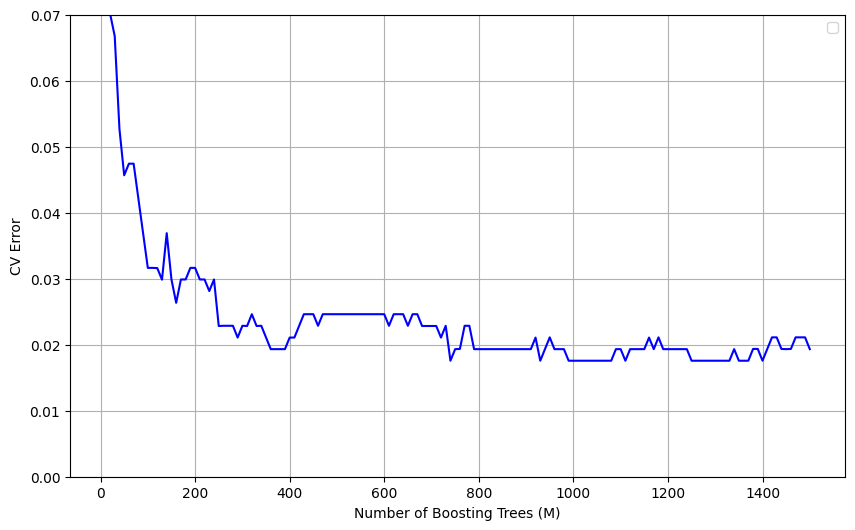

In [12]:
# and plotting the results
# Plot CV error versus number of boosting trees M
plt.figure(figsize=(10, 6))
plt.errorbar(M_values_gbt, cv_errors_1_gbt, color='blue')
plt.xlabel('Number of Boosting Trees (M)')
plt.ylabel('CV Error')
plt.ylim(0, 0.07)
# plt.title('CV Error vs. Number of Boosting Trees')
# plt.axhline(min(cv_errors_1) + std_errors_1[np.argmin(cv_errors_1)], color='blue', linestyle='--', label='1-SE Line 2-leaf')
# plt.axhline(min(cv_errors_2) + std_errors_2[np.argmin(cv_errors_2)], color='red', linestyle='--', label='1-SE Line 4-leaf')
# plt.axhline(min(cv_errors_3) + std_errors_3[np.argmin(cv_errors_3)], color='green', linestyle='--', label='1-SE Line 8-leaf')
plt.legend()
plt.grid()
plt.show()

In [14]:
# random forest
def randomForestClassifier(n_estimators=100, bootstrap=True, criterion="log_loss"):
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        bootstrap=bootstrap,
        criterion=criterion
    )
    return model

In [15]:
# examining three models where max #leaf nodes = 2, 5, 10
M_values_rf = range(10, 1510 ,10)
# specifying the range of number of trees to examine
cv_errors_rf = []
# std_errors_rf = []

# Perform 10-fold CV for each M
for M in M_values_rf:

    # first model cross validation errors
    model_rf = randomForestClassifier(n_estimators=M)
    scores = cross_val_score(model_rf, X, y, cv=10, scoring='accuracy') 
    mean_error = 1 - np.mean(scores)
    # std_error = np.std(scores) / np.sqrt(len(scores))
    cv_errors_rf.append(mean_error)
    # std_errors_rf.append(std_error)

c:\Users\aujo8\OneDrive\Desktop\uni\Statistical learning\project4\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\aujo8\OneDrive\Desktop\uni\Statistical learning\project4\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\aujo8\OneDrive\Desktop\uni\Statistical learning\project4\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\aujo8\OneDrive\Desktop\uni\Statistical learnin

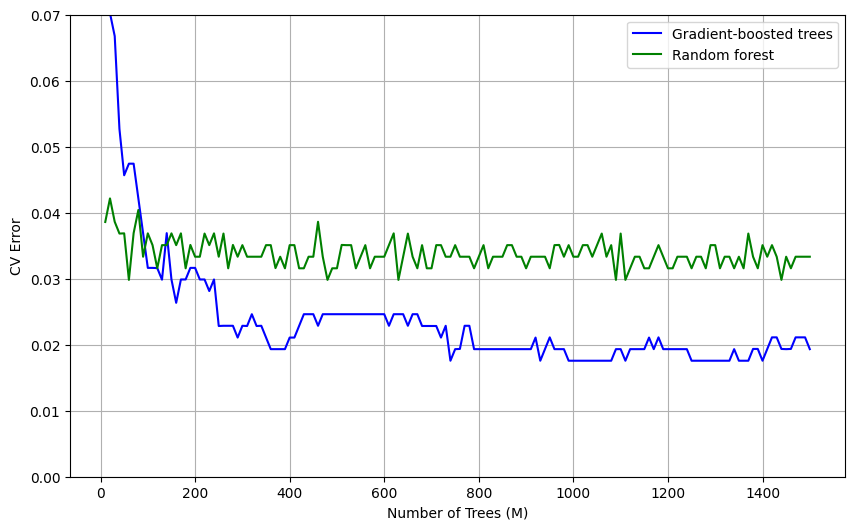

In [21]:
# and plotting the results
# Plot CV error versus number of boosting trees M
plt.figure(figsize=(10, 6))
plt.errorbar(M_values_gbt, cv_errors_1_gbt, color='blue', label='Gradient-boosted trees')
plt.errorbar(M_values_rf, cv_errors_rf, color='green', label='Random forest')
plt.xlabel('Number of Trees (M)')
plt.ylabel('CV Error')
plt.ylim(0, 0.07)
# plt.title('CV Error vs. Number of Boosting Trees')
# plt.axhline(min(cv_errors_1) + std_errors_1[np.argmin(cv_errors_1)], color='blue', linestyle='--', label='1-SE Line 2-leaf')
# plt.axhline(min(cv_errors_2) + std_errors_2[np.argmin(cv_errors_2)], color='red', linestyle='--', label='1-SE Line 4-leaf')
# plt.axhline(min(cv_errors_3) + std_errors_3[np.argmin(cv_errors_3)], color='green', linestyle='--', label='1-SE Line 8-leaf')
plt.legend()
plt.grid()
plt.show()